# Curso: Aprendizaje Automático
# Trabajo Práctico 4

Profesor: Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 11 de Noviembe 2024, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

Estudiante(s):
1. **Agustin Vargas**





___

# Clasificación
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso (20 puntos).
    1. Para cada uno de los algoritmos seleccionados:  (20 puntos).
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros (según la biblioteca).
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.  20 puntos).
    1. Programación del diseño experimental.  (20 puntos).
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda.  (20 puntos).

In [1]:
!pip install tabulate

In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [53]:
# Cargar el archivo
df = pd.read_csv('cardio.csv', delimiter=';')

In [54]:
print(tabulate(df.head(5), headers='keys', tablefmt='grid'))

+----+------+-------+----------+----------+----------+---------+---------+---------------+--------+---------+--------+----------+----------+
|    |   id |   age |   gender |   height |   weight |   ap_hi |   ap_lo |   cholesterol |   gluc |   smoke |   alco |   active |   cardio |
+====+======+=======+==========+==========+==========+=========+=========+===============+========+=========+========+==========+==========+
|  0 |    1 | 22469 |        1 |      155 |       69 |     130 |      80 |             2 |      2 |       0 |      0 |        1 |        0 |
+----+------+-------+----------+----------+----------+---------+---------+---------------+--------+---------+--------+----------+----------+
|  1 |    2 | 14648 |        1 |      163 |       71 |     110 |      70 |             1 |      1 |       0 |      0 |        1 |        1 |
+----+------+-------+----------+----------+----------+---------+---------+---------------+--------+---------+--------+----------+----------+
|  2 |    3 |

In [55]:
missing_values = df.isnull().sum()
print(missing_values)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


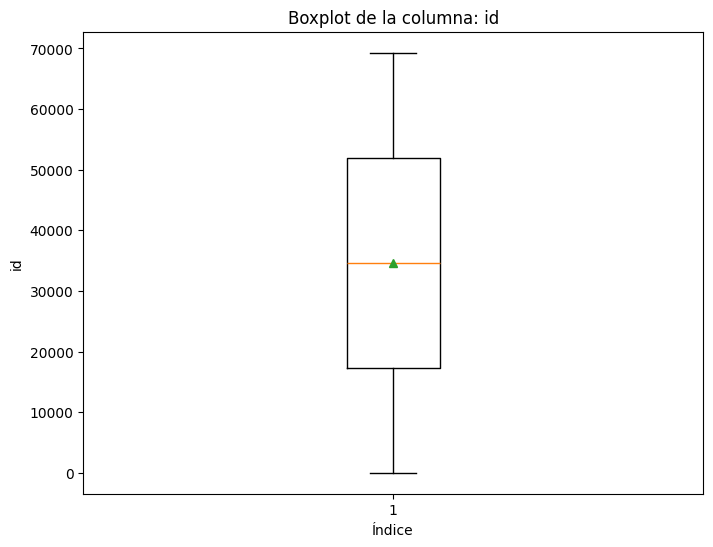

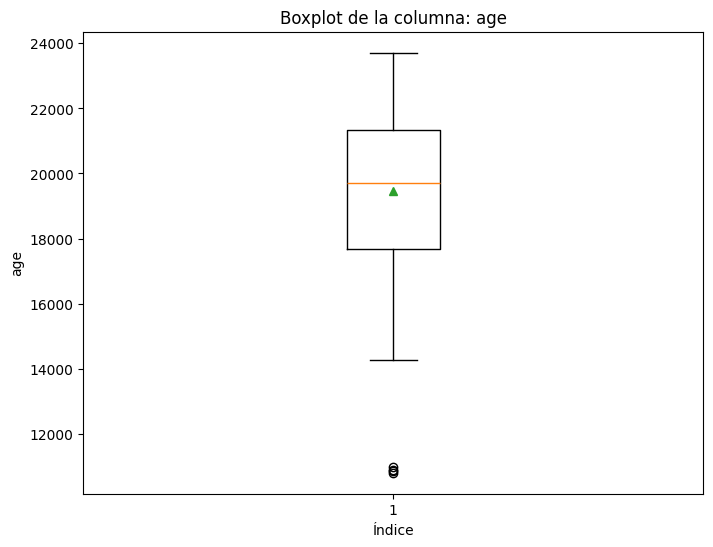

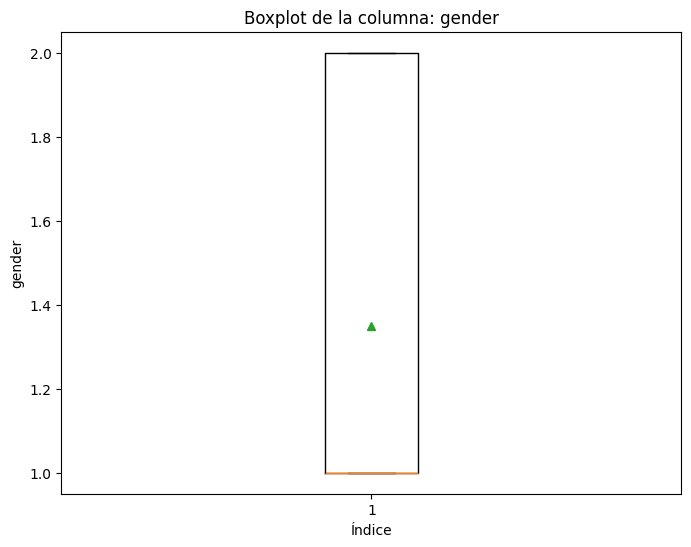

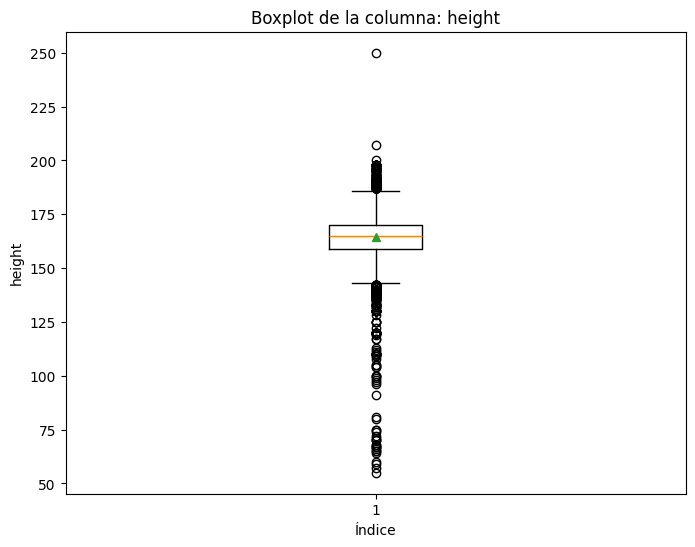

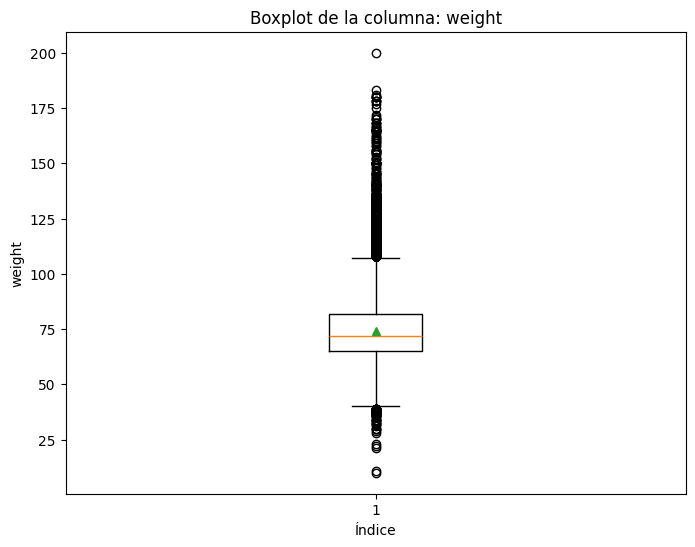

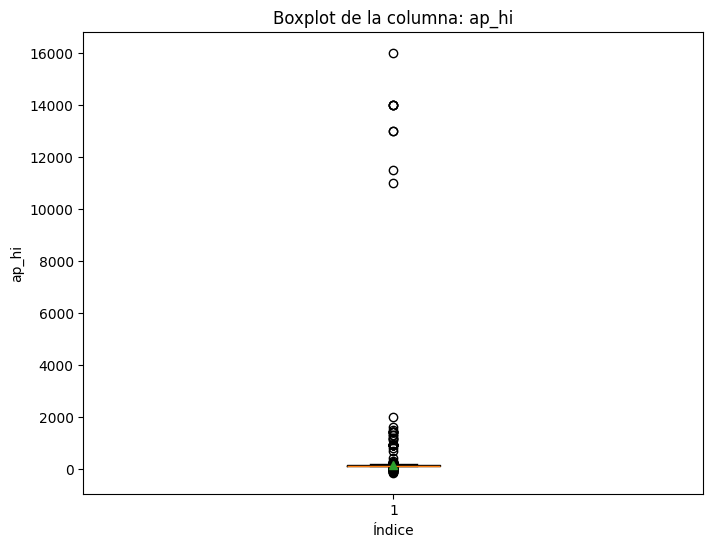

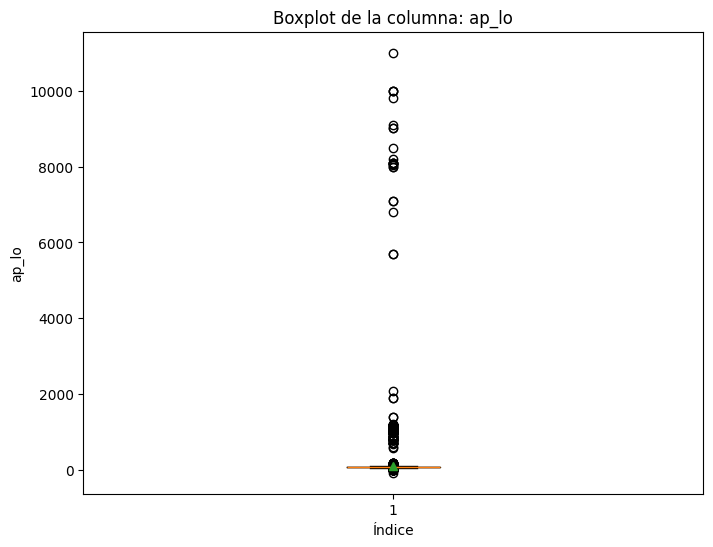

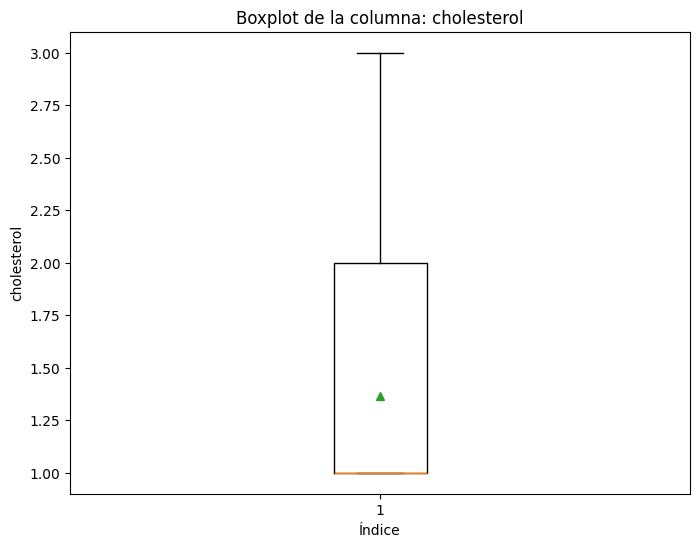

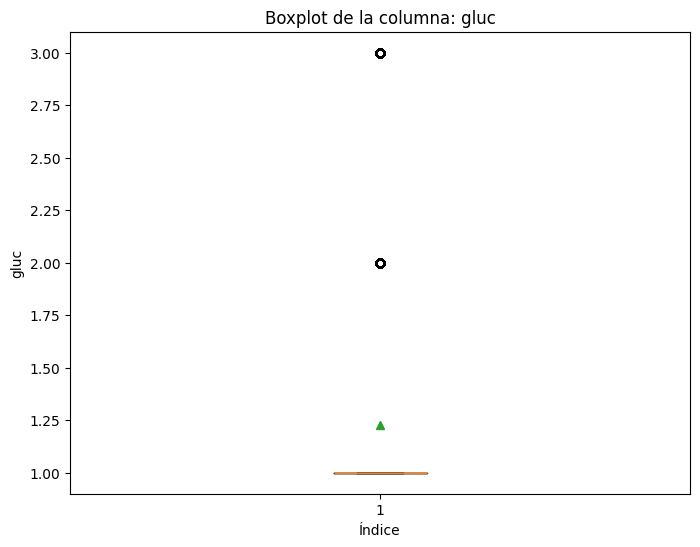

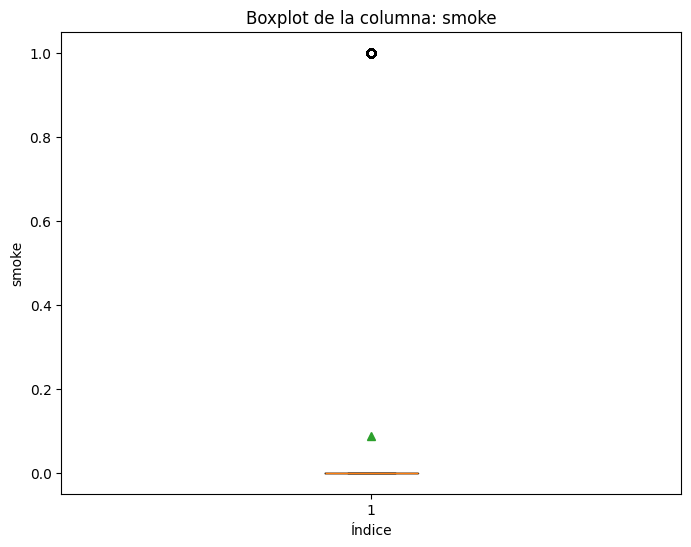

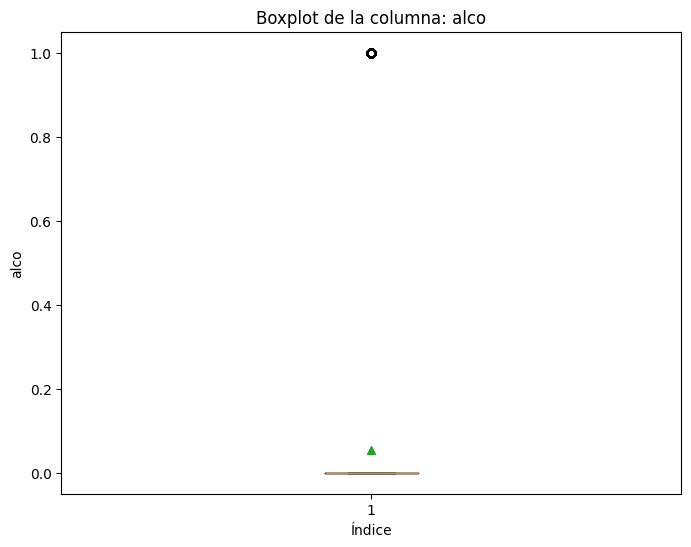

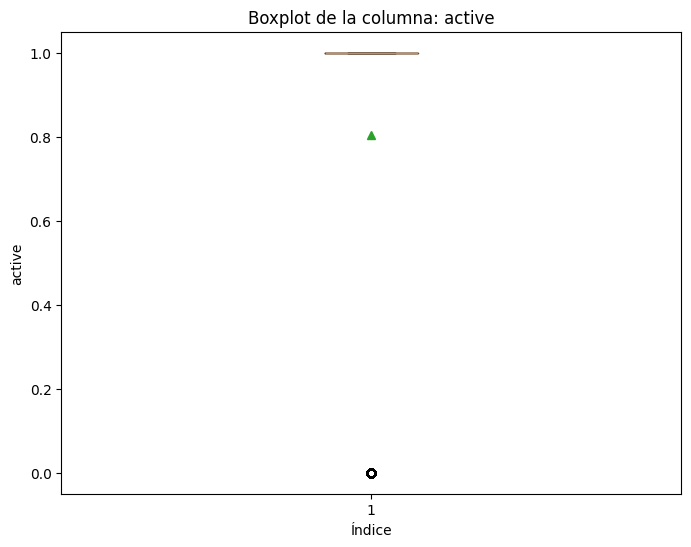

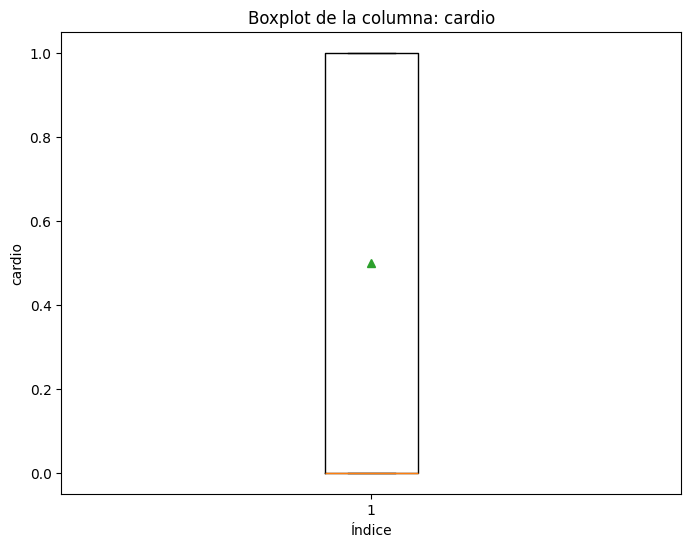

In [56]:
def visualizar_boxplot_por_columna(df):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Crear un boxplot para cada columna numérica
    for column in numeric_columns:
        pyplot.figure(figsize=(8, 6))
        pyplot.boxplot(df[column], showmeans=True)
        pyplot.title(f'Boxplot de la columna: {column}')
        pyplot.xlabel('Índice')
        pyplot.ylabel(column)
        pyplot.show()

visualizar_boxplot_por_columna(df)

In [57]:
def cantidad_outliers_por_columna(df):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Calcular outliers para cada columna numérica
    for columna in numeric_columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar los outliers
        outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
        print(f"Número de outliers en la columna {columna}: {len(outliers)}")

cantidad_outliers_por_columna(df)


Número de outliers en la columna id: 0
Número de outliers en la columna age: 4
Número de outliers en la columna gender: 0
Número de outliers en la columna height: 515
Número de outliers en la columna weight: 1802
Número de outliers en la columna ap_hi: 1419
Número de outliers en la columna ap_lo: 4584
Número de outliers en la columna cholesterol: 0
Número de outliers en la columna gluc: 10416
Número de outliers en la columna smoke: 6102
Número de outliers en la columna alco: 3734
Número de outliers en la columna active: 13584
Número de outliers en la columna cardio: 0


In [58]:
def cantidad_ceros(df):

    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Calcular zeros para cada columna numérica
    for columna in numeric_columns:
        num_zeros = (df[columna] == 0).sum()
        print(f"Número de ceros en la columna {columna}: {num_zeros}")


num_cero_values = cantidad_ceros (df)

print("===== Columnas con ceros =====")
print(num_cero_values)

Número de ceros en la columna id: 0
Número de ceros en la columna age: 0
Número de ceros en la columna gender: 0
Número de ceros en la columna height: 0
Número de ceros en la columna weight: 0
Número de ceros en la columna ap_hi: 0
Número de ceros en la columna ap_lo: 21
Número de ceros en la columna cholesterol: 0
Número de ceros en la columna gluc: 0
Número de ceros en la columna smoke: 63199
Número de ceros en la columna alco: 65567
Número de ceros en la columna active: 13584
Número de ceros en la columna cardio: 34679
===== Columnas con ceros =====
None


De acuerdo al analisis anterior en la exploracion de los datos y observando la documentacion del dataset se llega a la conclusion que las columnas con ceros no estan con ceros por error ya que este atributo lo asigana como un si o un no o en el caso de Cholesterol y Glucose el cual posee lo datos de 1: normal, 2: above normal, 3: well above normal, estas columnas se trataran con Dummy Encoder.
Las columnas como age,height, weight, ap_hi y ap_low los cuales si pueden poseer outliers se trataran de una forma diferente.

In [59]:
df_procesado = df.copy()

In [60]:
gender_dummies = pd.get_dummies(df_procesado['gender'], prefix='genero')
    
# Renombrar las columnas
gender_dummies.columns = ['gen_m', 'gen_h']
    
# Añadir las columnas de género al DataFrame
df_procesado = pd.concat([df_procesado, gender_dummies], axis=1)
    
# Eliminar la columna original de género
df_procesado = df_procesado.drop('gender', axis=1)

print(df_procesado.head(5))

   id    age  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   1  22469     155    69.0    130     80            2     2      0     0   
1   2  14648     163    71.0    110     70            1     1      0     0   
2   3  21901     165    70.0    120     80            1     1      0     0   
3   4  14549     165    85.0    120     80            1     1      1     1   
4   5  23393     155    62.0    120     80            1     1      0     0   

   active  cardio  gen_m  gen_h  
0       1       0   True  False  
1       1       1   True  False  
2       1       0   True  False  
3       1       0  False   True  
4       1       0   True  False  


In [61]:
# Crear dummies para colesterol
colesterol_dummies = pd.get_dummies(df_procesado['cholesterol'], prefix='colesterol')
colesterol_dummies.columns = ['colesterol_normal', 
                                'colesterol_alto', 
                                'colesterol_muy_alto']
    
# Crear dummies para glucosa
glucosa_dummies = pd.get_dummies(df_procesado['gluc'], prefix='glucosa')
glucosa_dummies.columns = ['glucosa_normal',
                             'glucosa_alta',
                             'glucosa_muy_alta']
    
# Añadir las nuevas columnas al DataFrame
df_procesado = pd.concat([df_procesado, colesterol_dummies, glucosa_dummies], axis=1)
    
# Eliminar las columnas originales
df_procesado.drop(['cholesterol', 'gluc'], axis=1, inplace=True)

print(df_procesado.head(5))

   id    age  height  weight  ap_hi  ap_lo  smoke  alco  active  cardio  \
0   1  22469     155    69.0    130     80      0     0       1       0   
1   2  14648     163    71.0    110     70      0     0       1       1   
2   3  21901     165    70.0    120     80      0     0       1       0   
3   4  14549     165    85.0    120     80      1     1       1       0   
4   5  23393     155    62.0    120     80      0     0       1       0   

   gen_m  gen_h  colesterol_normal  colesterol_alto  colesterol_muy_alto  \
0   True  False              False             True                False   
1   True  False               True            False                False   
2   True  False               True            False                False   
3  False   True               True            False                False   
4   True  False               True            False                False   

   glucosa_normal  glucosa_alta  glucosa_muy_alta  
0           False          True         

In [62]:
# Diccionario de mapeo para las columnas y sus nuevos nombres
columnas_mapping = {
        'smoke': 'fumador',
        'alco': 'alcoholico',
        'active': 'persona_activa',
        'cardio': 'cardiovascular'
}
    
# Procesar cada columna
for columna_original, columna_nueva in columnas_mapping.items():
    # Crear dummies pero con el nuevo nombre
    dummy = pd.get_dummies(df_procesado[columna_original], prefix=columna_nueva)
    # Asignar la columna con el nuevo nombre
    df_procesado[columna_nueva] = dummy[f"{columna_nueva}_1"]
    # Eliminar la columna original
    df_procesado = df_procesado.drop(columna_original, axis=1)
    
print(df_procesado.head(5))

   id    age  height  weight  ap_hi  ap_lo  gen_m  gen_h  colesterol_normal  \
0   1  22469     155    69.0    130     80   True  False              False   
1   2  14648     163    71.0    110     70   True  False               True   
2   3  21901     165    70.0    120     80   True  False               True   
3   4  14549     165    85.0    120     80  False   True               True   
4   5  23393     155    62.0    120     80   True  False               True   

   colesterol_alto  colesterol_muy_alto  glucosa_normal  glucosa_alta  \
0             True                False           False          True   
1            False                False            True         False   
2            False                False            True         False   
3            False                False            True         False   
4            False                False            True         False   

   glucosa_muy_alta  fumador  alcoholico  persona_activa  cardiovascular  
0          

In [63]:
cantidad_outliers_por_columna(df_procesado)

Número de outliers en la columna id: 0
Número de outliers en la columna age: 4
Número de outliers en la columna height: 515
Número de outliers en la columna weight: 1802
Número de outliers en la columna ap_hi: 1419
Número de outliers en la columna ap_lo: 4584


In [64]:
# Diccionario con las estrategias específicas para cada columna
estrategias = {
    'age': {
        'metodo': 'winsorization',
        'limites': (0.01, 0.99)
    },
    'height': {
        'metodo': 'iqr',
        'factor': 1.5
    },
    'weight': {
        'metodo': 'winsorization',
        'limites': (0.05, 0.95)  
    },
    'ap_hi': {
        'metodo': 'iqr',
        'factor': 1.5
    },
    'ap_lo': {
        'metodo': 'iqr',
        'factor': 1.5
    }
}
    
# Guardar estadísticas antes del tratamiento
stats_antes = {col: {
    'media': df_procesado[col].mean(),
    'mediana': df_procesado[col].median(),
    'std': df_procesado[col].std()
} for col in estrategias.keys()}
    
# Tratar cada columna según su estrategia
for columna, config in estrategias.items():
    print(f"\nProcesando outliers en columna: {columna}")
    datos_originales = df_procesado[columna].copy()
        
    if config['metodo'] == 'winsorization':
        # Usar winsorización con los percentiles especificados
        lower, upper = config['limites']
        q_lower = df_procesado[columna].quantile(lower)
        q_upper = df_procesado[columna].quantile(upper)
        df_procesado[columna] = df_procesado[columna].clip(q_lower, q_upper)
            
    elif config['metodo'] == 'iqr':
        # Usar método IQR
        Q1 = df_procesado[columna].quantile(0.25)
        Q3 = df_procesado[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - config['factor'] * IQR
        upper_bound = Q3 + config['factor'] * IQR
        df_procesado[columna] = df_procesado[columna].clip(lower_bound, upper_bound)
        


Procesando outliers en columna: age

Procesando outliers en columna: height

Procesando outliers en columna: weight

Procesando outliers en columna: ap_hi

Procesando outliers en columna: ap_lo


In [65]:
cantidad_outliers_por_columna(df_procesado)

Número de outliers en la columna id: 0
Número de outliers en la columna age: 0
Número de outliers en la columna height: 0
Número de outliers en la columna weight: 0
Número de outliers en la columna ap_hi: 0
Número de outliers en la columna ap_lo: 0


In [66]:
print(df_procesado.head(5))

   id    age  height  weight  ap_hi  ap_lo  gen_m  gen_h  colesterol_normal  \
0   1  22469   155.0    69.0    130     80   True  False              False   
1   2  14648   163.0    71.0    110     70   True  False               True   
2   3  21901   165.0    70.0    120     80   True  False               True   
3   4  14549   165.0    85.0    120     80  False   True               True   
4   5  23393   155.0    62.0    120     80   True  False               True   

   colesterol_alto  colesterol_muy_alto  glucosa_normal  glucosa_alta  \
0             True                False           False          True   
1            False                False            True         False   
2            False                False            True         False   
3            False                False            True         False   
4            False                False            True         False   

   glucosa_muy_alta  fumador  alcoholico  persona_activa  cardiovascular  
0          

Para tratar con los outliers se realizo un diccionario el cual posee las tecnicas a las que se van a someter cada columna:
- Para age y weight se utilizo el winsorization el cual tiene como obtivo tratar los outliers de forma que se acerquen al valor mas cercano dentro del limete que se establecio por ejemplo con age si es un valor mayor a 0.99 este lo acercara a 0.99 para que sea un valor dentro de un rango normal.
- Para las columnas height, ap_hi y ap_low se utilizo el IQR el cual es que sustituye los valores outliers por la media que se enceuntran entre el tercer y primer cuartil.

In [68]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_procesado), columns=df_procesado.columns)

print(df_scaled.head(20))

          id       age    height    weight  ap_hi  ap_lo  gen_m  gen_h  \
0   0.000000  0.886956  0.284091  0.311111  0.500  0.375    1.0    0.0   
1   0.000014  0.020171  0.465909  0.355556  0.250  0.125    1.0    0.0   
2   0.000029  0.824005  0.511364  0.333333  0.375  0.375    1.0    0.0   
3   0.000043  0.009199  0.511364  0.666667  0.375  0.375    0.0    1.0   
4   0.000058  0.989361  0.284091  0.155556  0.375  0.375    1.0    0.0   
5   0.000072  0.739998  0.488636  0.133333  0.125  0.125    1.0    0.0   
6   0.000087  0.401086  0.443182  0.377778  0.125  0.125    1.0    0.0   
7   0.000101  0.895600  0.420455  0.844444  0.625  0.625    1.0    0.0   
8   0.000115  0.751856  0.329545  0.288889  0.250  0.375    1.0    0.0   
9   0.000130  0.884407  0.352273  0.222222  0.625  0.625    1.0    0.0   
10  0.000144  0.238834  0.238636  0.044444  0.375  0.375    1.0    0.0   
11  0.000159  0.662307  0.602273  0.600000  0.500  0.625    0.0    1.0   
12  0.000173  0.964424  0.170455  0.02

In [78]:
original_filename = 'cardio.csv'

new_filename = original_filename.replace('.csv', '-PREPROCESADO.csv')

df_scaled.to_csv(new_filename, index=False)

print(f"Archivo guardado como: {new_filename}")

Archivo guardado como: cardio-PREPROCESADO.csv


Para normalizar los datos se utilizo MinMaxScaler, ya que es un datset no es complejo pero los valores que posee todos estan en diferentes unidades por lo que se decicio por esta tecnica de normalizacion para que todos los valores se encuentren entre 0 y 1.

# Implementacion de modelos 

En esta seccion se van a implemntar dos modelos los cuales van a predecir si una persona posee una enfermedad cardiovascular.
Para esto se utilizar el modelo que se estudio en la clase pasada que es el lineal regression y se utilizara RandomForest.

In [83]:
# Cargar el archivo preprocesado
df_models = pd.read_csv('cardio-PREPROCESADO.csv', delimiter=',')

In [84]:
print(df_models.head(5))

         id       age    height    weight  ap_hi  ap_lo  gen_m  gen_h  \
0  0.000000  0.886956  0.284091  0.311111  0.500  0.375    1.0    0.0   
1  0.000014  0.020171  0.465909  0.355556  0.250  0.125    1.0    0.0   
2  0.000029  0.824005  0.511364  0.333333  0.375  0.375    1.0    0.0   
3  0.000043  0.009199  0.511364  0.666667  0.375  0.375    0.0    1.0   
4  0.000058  0.989361  0.284091  0.155556  0.375  0.375    1.0    0.0   

   colesterol_normal  colesterol_alto  colesterol_muy_alto  glucosa_normal  \
0                0.0              1.0                  0.0             0.0   
1                1.0              0.0                  0.0             1.0   
2                1.0              0.0                  0.0             1.0   
3                1.0              0.0                  0.0             1.0   
4                1.0              0.0                  0.0             1.0   

   glucosa_alta  glucosa_muy_alta  fumador  alcoholico  persona_activa  \
0           1.0   

In [134]:
X_lineal = df_models.drop('cardiovascular', axis=1)
y_lineal = df_models['cardiovascular']

X_train_lineal, X_test_lineal, y_train_lineal, y_test_lineal = train_test_split(X_lineal,
                                                                                y_lineal, 
                                                                                test_size=0.3, 
                                                                                random_state=42)

print("Tamaño de los conjuntos de datos:")
print(f"Entrenamiento: {X_train_lineal.shape[0]} muestras ({X_train_lineal.shape[0]/len(X_lineal):.1%})")
print(f"Prueba: {X_test_lineal.shape[0]} muestras ({X_test_lineal.shape[0]/len(X_lineal):.1%})")


Tamaño de los conjuntos de datos:
Entrenamiento: 48510 muestras (70.0%)
Prueba: 20791 muestras (30.0%)


In [135]:
def calculate_metrics(y_true, y_pred):
    # Calcular accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calcular matriz de confusión
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calcular precision, recall y f1-score
    class_report = classification_report(y_true, y_pred)
    
    return accuracy, conf_matrix, class_report

In [136]:
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negativo', 'Positivo'],
                yticklabels=['Negativo', 'Positivo'])
    plt.title(title)
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.show()


=== Resultados de Regresión Lineal ===

Conjunto de Entrenamiento:
Accuracy: 0.7275

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74     24307
         1.0       0.76      0.66      0.71     24203

    accuracy                           0.73     48510
   macro avg       0.73      0.73      0.73     48510
weighted avg       0.73      0.73      0.73     48510


Conjunto de Prueba:
Accuracy: 0.7253

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74     10372
         1.0       0.76      0.66      0.71     10419

    accuracy                           0.73     20791
   macro avg       0.73      0.73      0.72     20791
weighted avg       0.73      0.73      0.72     20791



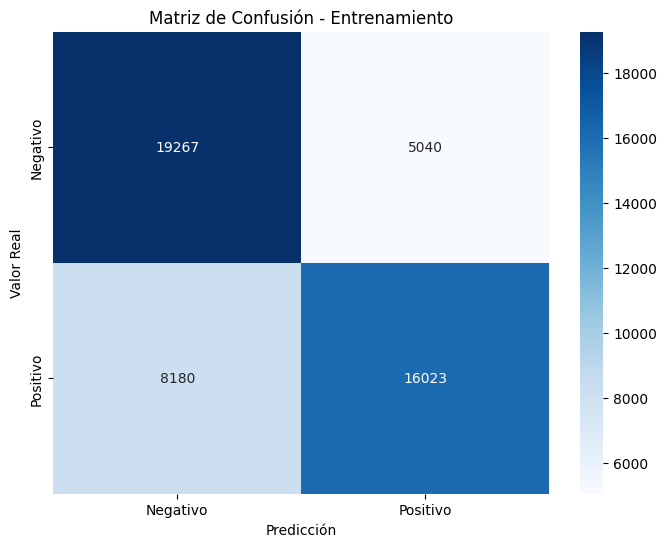

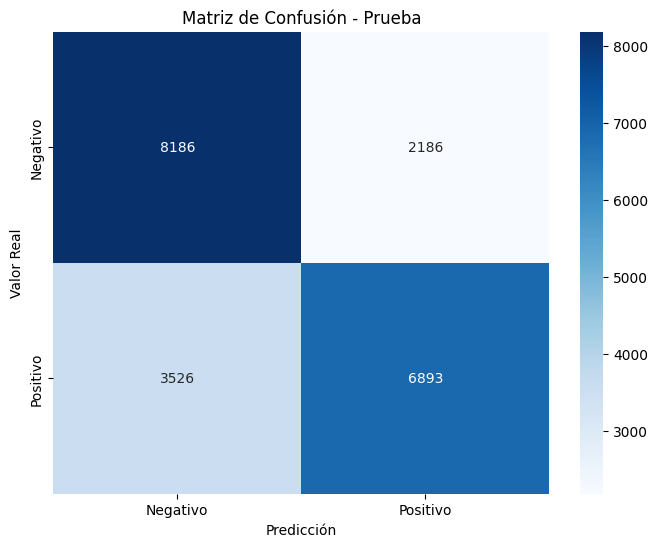

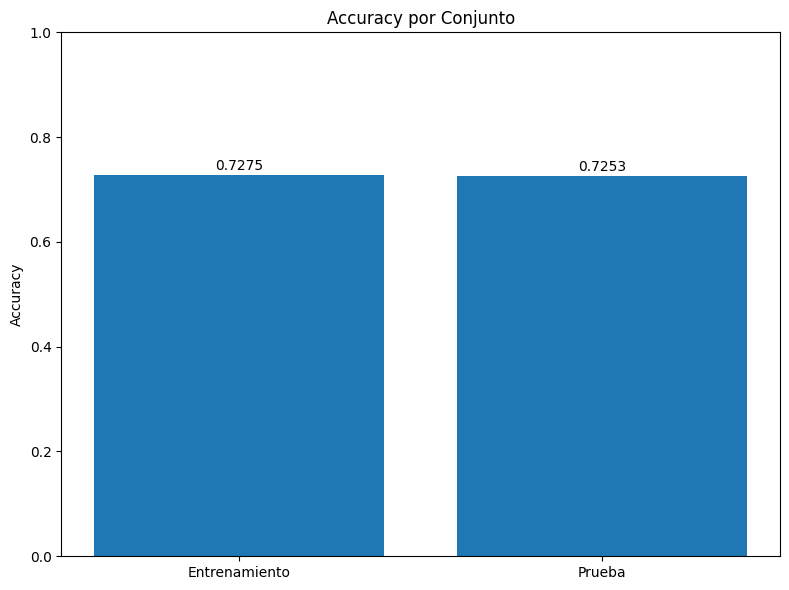


Resumen de Métricas:
Accuracy en entrenamiento: 0.7275
Accuracy en prueba: 0.7253


In [142]:
def train_and_evaluate_lineal(X_train_lineal, y_train_lineal, X_test_lineal, y_test_lineal):
    # Entrenar Logistic Regression
    lineal = LinearRegression()
    lineal.fit(X_train_lineal, y_train_lineal)
    
    # Obtener predicciones continuas
    train_pred_raw = lineal.predict(X_train_lineal)
    test_pred_raw = lineal.predict(X_test_lineal)
    
    # Convertir predicciones a clasificación binaria (0 o 1)
    train_pred = (train_pred_raw > 0.5).astype(int)
    test_pred = (test_pred_raw > 0.5).astype(int)
    
    # Calcular métricas usando la función calculate_metrics
    print("\n=== Resultados de Regresión Lineal ===")
    
    print("\nConjunto de Entrenamiento:")
    acc_train, conf_mat_train, report_train = calculate_metrics(y_train_lineal, train_pred)
    print(f"Accuracy: {acc_train:.4f}")
    print("\nReporte de Clasificación:")
    print(report_train)
    
    print("\nConjunto de Prueba:")
    acc_test, conf_mat_test, report_test = calculate_metrics(y_test_lineal, test_pred)
    print(f"Accuracy: {acc_test:.4f}")
    print("\nReporte de Clasificación:")
    print(report_test)
    
    # Crear DataFrame con resultados
    resultados = pd.DataFrame({
        'Conjunto': ['Entrenamiento', 'Prueba'],
        'Accuracy': [acc_train, acc_test]
    })
    
    # Visualizar matrices de confusión
    plot_confusion_matrix(conf_mat_train, 'Matriz de Confusión - Entrenamiento')
    plot_confusion_matrix(conf_mat_test, 'Matriz de Confusión - Prueba')
    
 # Gráfico de accuracy
    plt.figure(figsize=(8, 6))
    plt.bar(resultados['Conjunto'], resultados['Accuracy'])
    plt.title('Accuracy por Conjunto')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate(resultados['Accuracy']):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
    plt.tight_layout()
    plt.show()
    
    return lineal, resultados, (train_pred, test_pred)

# Entrenar y evaluar el modelo
modelo_lineal, resultados, predicciones = train_and_evaluate_lineal(X_train_lineal, y_train_lineal, X_test_lineal, y_test_lineal)

# Mostrar resumen de métricas
print("\nResumen de Métricas:")
print(f"Accuracy en entrenamiento: {resultados['Accuracy'][0]:.4f}")
print(f"Accuracy en prueba: {resultados['Accuracy'][1]:.4f}")

Para este primer modelo se utilizo lineal Regression ya que es sencillo para predicir si posee o no posee una enfermadad cardiovascular. 
Una vez que se realizo el entrnamiento del modelo y se evaluo se llego a la conclusion que no es un modelo muy bueno ya que el accuracy del conjunto de prueba y el conjunto de entrenamiento es muy similar, tambien observando la matriz de confuncion vemos que no clasifico del todo bien los Verdaderos Negativos, Falsos Positivos, Falsos Negativos y Verdaderos Positivos.
Teniendo en cuenta esto no es un modelo que se pueda tener en cuenta debido a la naturaleza de los datos, y en un futuro puede generar algun problema.

In [114]:
X_random = df_models.drop('cardiovascular', axis=1)
y_random = df_models['cardiovascular']
X_train_random, X_test_val_random, y_train_random, y_test_val_random = train_test_split(X_random,
                                                                                                y_random, 
                                                                                                test_size=0.4, 
                                                                                                random_state=42)

X_test_random, X_val_random, y_test_random, y_val_random = train_test_split(X_test_val_random, 
                                                                                    y_test_val_random, 
                                                                                    test_size=0.50,
                                                                                    random_state=42)

print("Tamaño de los conjuntos de datos:")
print(f"Entrenamiento: {X_train_random.shape[0]} muestras ({X_train_random.shape[0]/len(X_random):.1%})")
print(f"Validación: {X_val_random.shape[0]} muestras ({X_val_random.shape[0]/len(X_random):.1%})")
print(f"Prueba: {X_test_random.shape[0]} muestras ({X_test_random.shape[0]/len(X_random):.1%})")

Tamaño de los conjuntos de datos:
Entrenamiento: 41580 muestras (60.0%)
Validación: 13861 muestras (20.0%)
Prueba: 13860 muestras (20.0%)


In [115]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    class_report = classification_report(y, y_pred)
    return accuracy, conf_matrix, class_report

In [127]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, 25, 30],
}

# Inicializar la validación cruzada
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Lista para almacenar resultados
results = []


In [128]:
# Iteramos sobre los hiperparámetros
for n_est in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        print(f"\nProbando: n_estimators={n_est}, max_depth={depth}")
        
        # Entrenamos el modelo con los datos de entrenamiento
        rf = RandomForestClassifier(
            n_estimators=n_est,
            max_depth=depth,
            random_state=42
        )
        
        rf.fit(X_train_random, y_train_random)
        
        # Evaluamos en el conjunto de validación
        accuracy_val, conf_matrix_val, report_val = evaluate_model(rf, X_val_random, y_val_random)
        
        results.append({
            'n_estimators': n_est,
            'max_depth': depth,
            'validation_accuracy': accuracy_val,
        })
        
        print(f"Validación: Accuracy = {accuracy_val:.4f}")
        print("\nMatriz de Confusión:")
        print(conf_matrix_val)
        print("\nReporte de Clasificación:")
        print(report_val)

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)
print("\nResumen de todos los resultados:")
print(results_df)


Probando: n_estimators=100, max_depth=10
Validación: Accuracy = 0.7341

Matriz de Confusión:
[[5464 1473]
 [2212 4712]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      6937
         1.0       0.76      0.68      0.72      6924

    accuracy                           0.73     13861
   macro avg       0.74      0.73      0.73     13861
weighted avg       0.74      0.73      0.73     13861


Probando: n_estimators=100, max_depth=15
Validación: Accuracy = 0.7348

Matriz de Confusión:
[[5386 1551]
 [2125 4799]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      6937
         1.0       0.76      0.69      0.72      6924

    accuracy                           0.73     13861
   macro avg       0.74      0.73      0.73     13861
weighted avg       0.74      0.73      0.73     13861


Probando: n_estimators=100, max_depth=20
Validaci


Mejores hiperparámetros encontrados:
n_estimators: 100.0
max_depth: 15.0
Accuracy en validación: 0.7348

Resultados finales en el conjunto de prueba:
Accuracy: 0.7352

Matriz de Confusión:


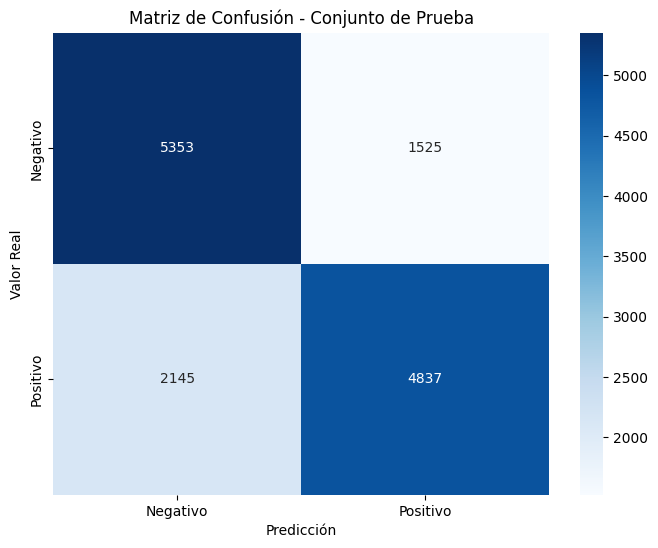


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74      6878
         1.0       0.76      0.69      0.72      6982

    accuracy                           0.74     13860
   macro avg       0.74      0.74      0.73     13860
weighted avg       0.74      0.74      0.73     13860



In [129]:
# Encontrar los mejores hiperparámetros
best_model_idx = results_df['validation_accuracy'].idxmax()
best_params = results_df.iloc[best_model_idx]
print("\nMejores hiperparámetros encontrados:")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"max_depth: {best_params['max_depth']}")
print(f"Accuracy en validación: {best_params['validation_accuracy']:.4f}")

# Entrenar el modelo final con los mejores hiperparámetros
final_model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    random_state=42
)

# Entrenar el modelo final con todos los datos de entrenamiento
final_model.fit(X_train_random, y_train_random)

# Evaluar en el conjunto de prueba
accuracy_test, conf_matrix_test, report_test = evaluate_model(final_model, X_test_random, y_test_random)

print("\nResultados finales en el conjunto de prueba:")
print(f"Accuracy: {accuracy_test:.4f}")
print("\nMatriz de Confusión:")
plot_confusion_matrix(conf_matrix_test, 'Matriz de Confusión - Conjunto de Prueba')
print("\nReporte de Clasificación:")
print(report_test)

# Visualizar importancia de características
feature_importance = pd.DataFrame({
    'feature': X_train_random.columns,
    'importance': final_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

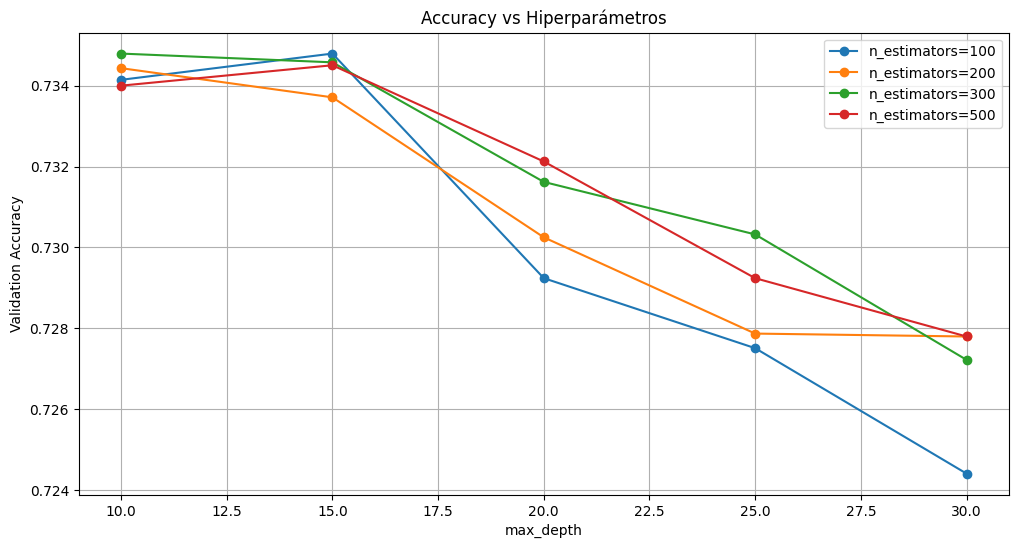

In [131]:
# Visualizar accuracy para diferentes configuraciones
plt.figure(figsize=(12, 6))
for n_est in param_grid['n_estimators']:
    subset = results_df[results_df['n_estimators'] == n_est]
    plt.plot(subset['max_depth'], subset['validation_accuracy'], 
             marker='o', label=f'n_estimators={n_est}')

plt.xlabel('max_depth')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs Hiperparámetros')
plt.legend()
plt.grid(True)
plt.show()


En este caso se utilizo random forest, el cual se consideraba que podia tener un mejor desempeño, segun vemos en el grafico podemos concluir que los mejores hiperparametros fueron de 100 bosques y con una profundidad de 15, pero esto no tiene un resultado satisfactorio ya que el accuracy es muy similar al modelo anterior.
Se podria utilizar cualquiera de los dos modelos ya que el accuracy es muy similar pero recomiendo el linear regression ya que es el mas sencillo en casa de tener que hacer alguna modificacion.